## Biodiversity of Endangered Species in National Parks

# Biodiversity in National Parks

## Introduction:
#### Dataset: 

Data on biodiversity of endangered species in National Parks has been provided by Codecademy.com as part of a portfolio project prompt.

The brief on the project states that the data is from the National Parks Service and covers observations of different species of various conservation levels at several US National parks. It states that we will investigate to find any patterns or themes to the types of species that become endangered. During this project I have transformed and loaded the data, investigated patterns and themes, and created representative visuals.

The initial dataset included two csv's, 'observations.csv' and 'species_info.csv'. Observations.csv contains 23296 rows of data on the species observed within four National Parks, with a count of observations, park where it was observed and scientific name of the species. The species_info.csv contains columns for scientific name, common names, and conservation status and has data for 5824 species. In data_cleaning_biodiversity.ipynb I removed duplicates, resolved missing data, and merged the two csv into one, biodiversity_data.csv for analysis.

The dataset includes scientific_name, common_names, the observation count, and three categorical variables. The categorical variables:
| Column Name | N-Unique | Unique Values |
| --- | ----------- | --------- |
| park_name | 4 | 'Bryce', 'Great Smokey Mountain', 'Yellowstone', 'Yosemite' | 
| conservation_status | 5 | 'Least Concern', 'Species of Concern', 'Threatened', 'Endangered', 'In Recovery' |
| category | 7 | 'Vascular Plant', 'Nonvascular Plant', 'Amphibian', 'Bird', 'Fish', 'Reptile', 'Mammal' |

Observations has the following spread:
| Measure | Observations |
| --- | ---|
| count | 22164 |
| mean | 149.5 |
| std | 81.2 |
| min | 9 |
| 25% | 88 |
| 50%  | 129 |
| 75% | 217 |
| max | 805 |

Additionally, new bionomial column 'protection_listing' was added based on the 'conservation_status' variable where 0 is 'Least Concern', and all other values are 1, ('Species of Concern', 'Threatened', 'Endangered', 'In Recovery'). It was added to separated those species with a conservation status from those without more quickly.

#### Analysis: 

Data was visualized to illuminate the number of observations that are predominated by species without a conservation status (ie 'Species of Least Concern') and within those observations by species in the category of plants ('Vascular Plants' and 'Nonvascular Plants'). 

ANOVA Analysis was performed to see if there was a correlation between species category and species conservation protection listing. Were mammals more likely to be listed as endangered than say fish? 


In [74]:
#import py libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker
import seaborn as sns 
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from scipy.stats import chi2_contingency
#set options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
sns.set_theme(rc={'axes.formatter.limits': (-8, 9)})

In [75]:
biodiv = pd.read_csv("biodiversity_data.csv")
print(biodiv.describe())

       observations
count       22164.0
mean          149.5
std            81.2
min             9.0
25%            88.0
50%           129.0
75%           217.0
max           805.0


In [76]:
#the protection listing of a species can be thought of as an binomial variable where species of Least Concern: 0 and protection listed classes: 1. 
protected_class = {'Least Concern': 0, 'Species of Concern': 1, 'In Recovery': 1, 'Threatened':1, 'Endangered':1}
biodiv['protection_listing'] = biodiv['conservation_status'].apply(lambda x: protected_class.get(x))
print(biodiv.describe(include= 'all'))

       scientific_name park_name  observations        category conservation_status        common_names  protection_listing
count            22164     22164       22164.0           22164               22164               22164             22164.0
unique            5541         4           NaN               7                   5                5236                 NaN
top      Abies bifolia     Bryce           NaN  Vascular Plant       Least Concern  Brachythecium Moss                 NaN
freq                 4      5541           NaN           17048               21448                  28                 NaN
mean               NaN       NaN         149.5             NaN                 NaN                 NaN                 0.0
std                NaN       NaN          81.2             NaN                 NaN                 NaN                 0.2
min                NaN       NaN           9.0             NaN                 NaN                 NaN                 0.0
25%             

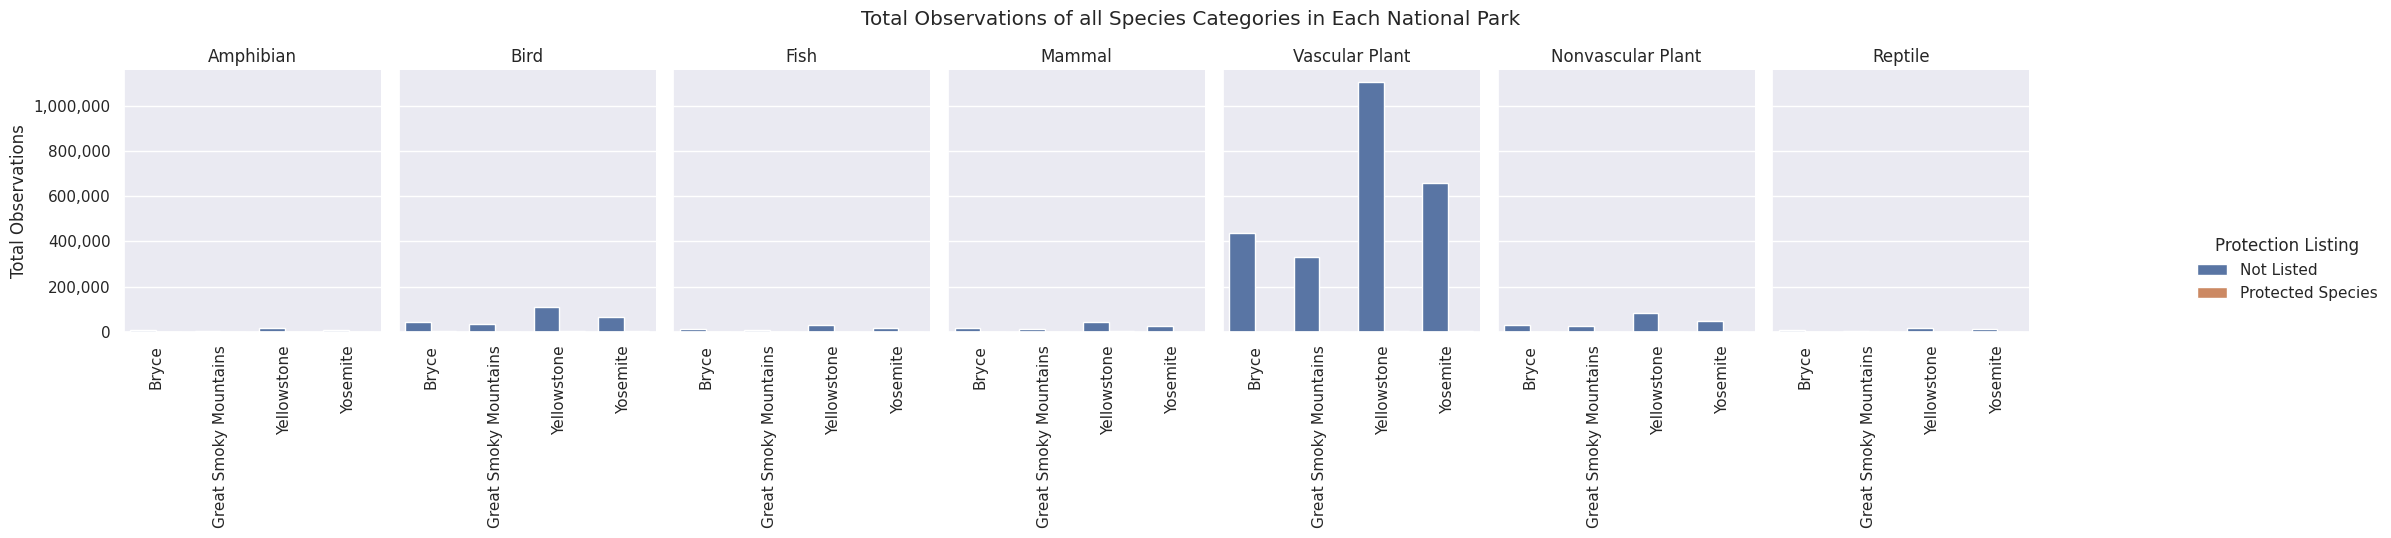

In [77]:
# create a visual of the data spread
biodiv_grouped = biodiv.groupby(['conservation_status', 'protection_listing', 'category', 'park_name'], as_index=False)["observations"].sum()

a=sns.catplot(
    data = biodiv_grouped,
    x='park_name',
    y='observations',
    col = 'category',
    hue= 'protection_listing',
    kind = 'bar',
    errorbar= None,
    height = 4,
    aspect = .8,
    #sharey= 'none'
    legend_out= True
)
a.set_xticklabels(rotation = 90)
a.set_titles("{col_name}")
a.figure.subplots_adjust(top=.86)
a.figure.suptitle('Total Observations of all Species Categories in Each National Park')
a.set_axis_labels('', 'Total Observations')
for ax in a.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
legend = a._legend
legend.set_title('Protection Listing')
for t, l in zip(legend.texts,('Not Listed', 'Protected Species')):
    t.set_text(l)
a.figure.subplots_adjust(top=0.83
                      ,right=0.85)
plt.savefig("png_biodiv_total_observations.png")
plt.show()
plt.close('all')
#Plants and Species of Least Concern are hiding the visibility of vulnerable species. 


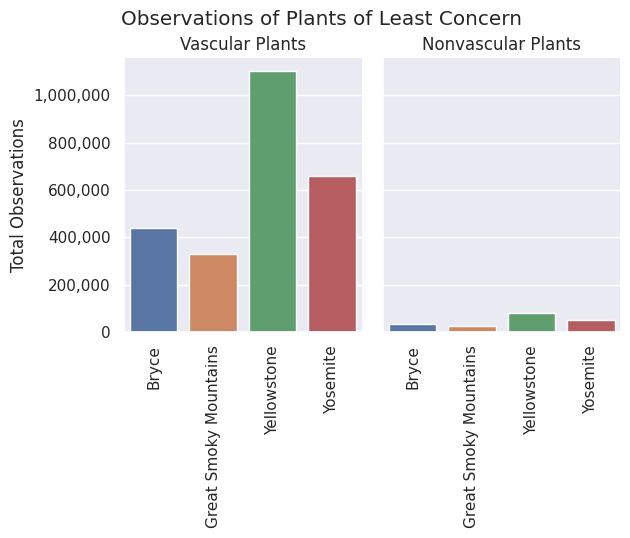

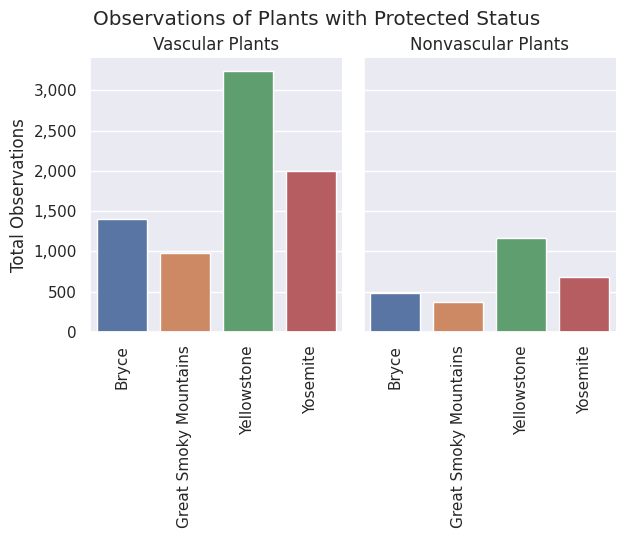

In [78]:
#For greater visibility into the protection status of relative groups of species and plants we can split into two dataframes, one for plants and one for animals.
#plants
biodiv_plants = biodiv[biodiv['category'].str.contains('Plant')].reset_index(drop=True)
biodiv_plants_gp_status= biodiv_plants.groupby(['conservation_status', 'protection_listing', 'category', 'park_name'], as_index=False)["observations"].sum()

g=sns.catplot(
    data = biodiv_plants_gp_status[biodiv_plants_gp_status['protection_listing']==0],
    x='park_name',
    y='observations',
    col = 'category',
    col_order = ['Vascular Plant', 'Nonvascular Plant'],
    kind = 'bar',
    errorbar= None,
    height = 4,
    aspect = .8,
    #sharey= 'none'
)
g.set_xticklabels(rotation = 90)
g.set_titles("{col_name}s")
g.figure.subplots_adjust(top=.86)
g.figure.suptitle('Observations of Plants of Least Concern')
g.set_axis_labels('', 'Total Observations')
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("png_biodiv_total_obs_plants_0.png")
plt.show()
plt.close('all')
h=sns.catplot(
    data = biodiv_plants_gp_status[biodiv_plants_gp_status['protection_listing']==1],
    x='park_name',
    y='observations',
    col = 'category',
    col_order = ['Vascular Plant', 'Nonvascular Plant'],
    kind = 'bar',
    errorbar= None,
    height = 4,
    aspect = 0.8,
)
h.set_xticklabels(rotation = 90)
h.set_titles("{col_name}s")
h.figure.subplots_adjust(top=.86)
h.figure.suptitle('Observations of Plants with Protected Status')
h.set_axis_labels('', 'Total Observations')
for ax in h.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("png_biodiv_total_obs_plants_1.png")
plt.show()
plt.close('all')

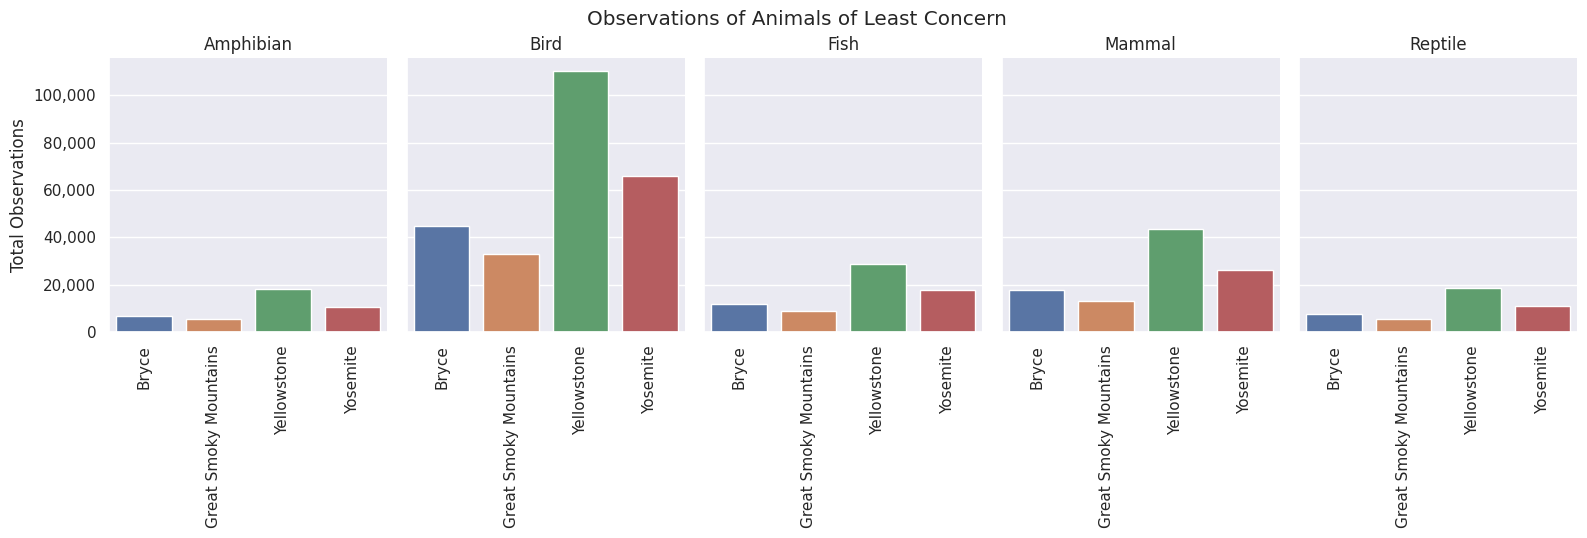

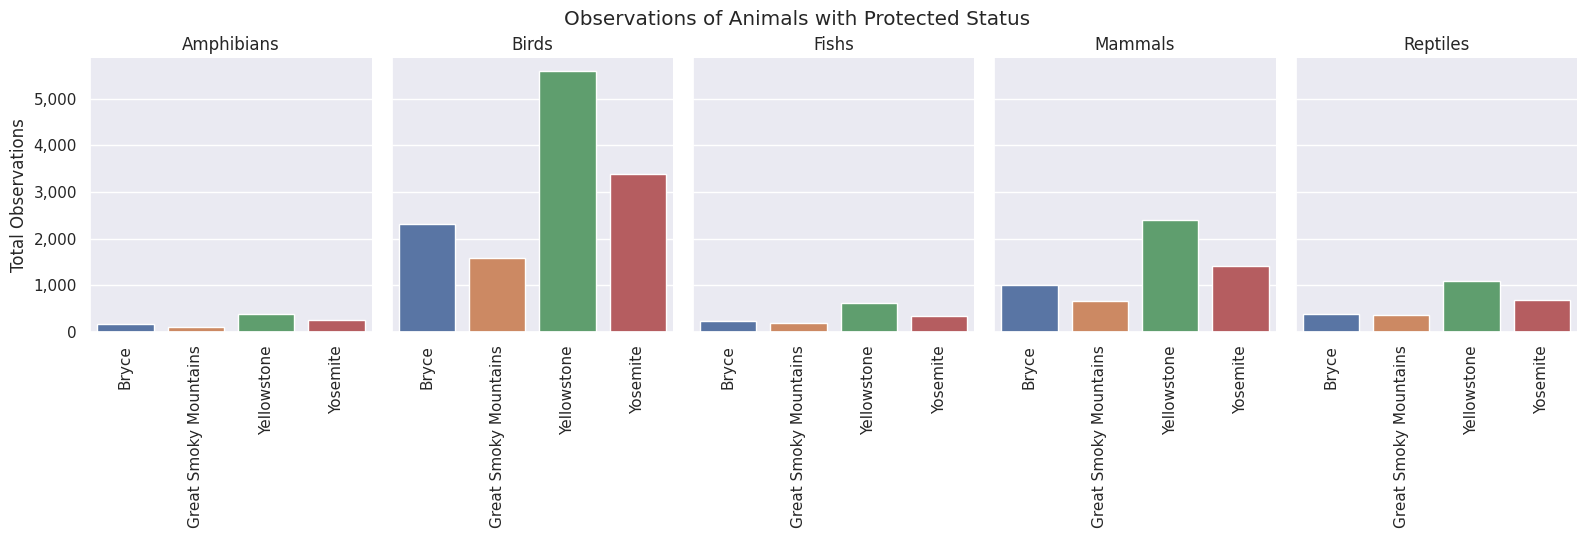

In [79]:
#For greater visibility into the protection status of relative groups of species and animals we can split into two dataframes, one for animals and one for animals.
#animals
biodiv_animals = biodiv[biodiv['category'].str.contains('Plant')==False].reset_index(drop=True)
biodiv_animals_gp_status= biodiv_animals.groupby(['conservation_status', 'protection_listing', 'category', 'park_name'], as_index=False)["observations"].sum()
category_order = list(biodiv_animals_gp_status.category.unique())
g=sns.catplot(
    data = biodiv_animals_gp_status[biodiv_animals_gp_status['protection_listing']==0],
    x='park_name',
    y='observations',
    col = 'category',
    #col_order = category_order,
    kind = 'bar',
    errorbar= None,
    height = 4,
    aspect = .8,
)
g.set_axis_labels('', 'Total Observations')
g.set_xticklabels(rotation = 90)
g.set_titles("{col_name}")
g.figure.subplots_adjust(top=.86)
g.figure.suptitle('Observations of Animals of Least Concern')
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("png_biodiv_total_obs_animals_0.png")
plt.show()
plt.close('all')
h=sns.catplot(
    data = biodiv_animals_gp_status[biodiv_animals_gp_status['protection_listing']==1],
    x='park_name',
    y='observations',
    col = 'category',
    #col_order = category_order,
    kind = 'bar',
    errorbar= None,
    height = 4,
    aspect = 0.8
)

h.set_axis_labels('', 'Total Observations')
h.set_xticklabels(rotation = 90)
h.set_titles("{col_name}s")
h.figure.subplots_adjust(top=.86)
h.figure.suptitle('Observations of Animals with Protected Status')
for ax in h.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("png_biodiv_total_obs_animals_1.png")
plt.show()
plt.close('all')

## Analysis:

### Is species category correlated with conservation status?
#### Method:
    - Group by species (scientific name) to meet independence of observation needed for Chi2
    - Create Contingency Tables for protection listing vs category across full dataset
    - Utilize stats.chi2_contingency to find Chi2 and p-value to ascertain correlation between variables.
    - Calculated Cramér's V to establish strength of corellation.
#### Analysis:
**All species**

The chi2 statistic, p-value, and Cramér's V for protection listing vs category for all species are displayed in the table below. The high Chi2 statistic and low p-value indicate a statistically significant correlation. The correlation is only of moderate strength as seen by the Cramér's V of 0.277.

| Chi2 | P-Value | Cramér's V |
| --- | --- | --- |
| 426.6 | 5.14 e-89 | 0.277 |

**Plant species**

There was no correlation between plant species and protection listing. 

| Chi2 | P-Value | Cramér's V |
| --- | --- | --- |
| 0.19| 0.66 | n/a |

**Animal species**

There was a slight correlation between animal category and protection listing, but based on the Cramér's V, the association was so weak that was not significant. 

| Chi2 | P-Value | Cramér's V |
| --- | --- | --- |
|10.5| 0.03 | 0.10 |

**Protected Animal category vs Conservation Status**

There was a moderate corelation between animal category and conservation status for animals with a protection listing. With a Chi2 over 40 and a p-val well below the threshold, it is a statistically significant association. 
| Chi2 | P-Value | Cramér's V |
| --- | --- | --- |
|40.91| 5.08 e-05 | 0.33 |

#### Analysis Summary:
**There is a statistically significant, moderate correlation between species category and protection status across the full dataset, and a moderate statistically significant correlation between Animal category and conservation status for animals with a protected status.** 

In [80]:
#Calculated the contingency table and Chi-Square Statistic for Protection Status by Category
biodiv_species = biodiv.groupby(['scientific_name', 'category', 'conservation_status', 'protection_listing'], as_index=False)['observations'].sum()
status_category_contingency = pd.crosstab(biodiv_species['protection_listing'],biodiv_species['category'])
print(f"Contingency table for Protected Status vs Category:\n{status_category_contingency}")
chi2, pval, dof, expected =chi2_contingency(status_category_contingency)
print(f"Chi-square Statistic - for plant and animal categories: {chi2}")
print(f"P-value - for plant and animal categories: {pval}")
print(f"Degrees of Freedom - for plant and animal categories: {dof}")
#Calculate Cramér's V 
n = np.sum(status_category_contingency.sum())
r,c = status_category_contingency.shape
cramers_v = np.sqrt(chi2/(n*(min(r, c)-1)))
print(f"Cramér's V: {cramers_v}")

Contingency table for Protected Status vs Category:
category            Amphibian  Bird  Fish  Mammal  Nonvascular Plant  Reptile  Vascular Plant
protection_listing                                                                           
0                          72   413   114     146                328       73            4216
1                           7    75    11      30                  5        5              46
Chi-square Statistic - for plant and animal categories: 426.667296905628
P-value - for plant and animal categories: 5.146759135429976e-89
Degrees of Freedom - for plant and animal categories: 6
Cramér's V: 0.27749208693544747


In [81]:
biodiv_plant_species = biodiv_species[biodiv_species['category'].isin(['Nonvascular Plant', 'Vascular Plant'])]
biodiv_animal_species = biodiv_species[biodiv_species['category'].isin(['Bird', 'Amphibian', 'Reptile', 'Mammal', 'Fish'])]

In [82]:
plant_status_category_contingency = pd.crosstab(biodiv_plant_species['protection_listing'],biodiv_plant_species['category'])
print(f"Contingency table for Conservation Status vs Category - for Plants:\n{plant_status_category_contingency}")
chi2, pval, dof, expected = stats.chi2_contingency(plant_status_category_contingency)
print(f"Chi-square Statistic - for Plants: {chi2}")
print(f"P-value - for Plants: {pval}")
print(f"Degrees of Freedom - for Plants: {dof}")

Contingency table for Conservation Status vs Category - for Plants:
category            Nonvascular Plant  Vascular Plant
protection_listing                                   
0                                 328            4216
1                                   5              46
Chi-square Statistic - for Plants: 0.19069121233812064
P-value - for Plants: 0.6623419491381985
Degrees of Freedom - for Plants: 1


In [83]:
animal_status_category_contingency = pd.crosstab(biodiv_animal_species['protection_listing'],biodiv_animal_species['category'])
print(f"Contingency table for Conservation Status vs Category - for animals:\n{animal_status_category_contingency}")
chi2, pval, dof, expected = stats.chi2_contingency(animal_status_category_contingency)
print(f"Chi-square Statistic - for animals: {chi2}")
print(f"P-value - for animals: {pval}")
print(f"Degrees of Freedom - for animals: {dof}")
#Calculate Cramér's V 
n = np.sum(animal_status_category_contingency.sum())
r,c = animal_status_category_contingency.shape
cramers_v = np.sqrt(chi2/(n*(min(r, c)-1)))
print(f"Cramér's V: {cramers_v}")

Contingency table for Conservation Status vs Category - for animals:
category            Amphibian  Bird  Fish  Mammal  Reptile
protection_listing                                        
0                          72   413   114     146       73
1                           7    75    11      30        5
Chi-square Statistic - for animals: 10.511252633180641
P-value - for animals: 0.032642340429092906
Degrees of Freedom - for animals: 4
Cramér's V: 0.10540996495401866


In [84]:
animal_protected = biodiv_animal_species[biodiv_animal_species['protection_listing']==1]
animal_status_category_contingency = pd.crosstab(animal_protected['conservation_status'],animal_protected['category'])
print(f"Contingency table for Conservation Status vs Category - for Protected animals:\n{animal_status_category_contingency}")
chi2, pval, dof, expected = stats.chi2_contingency(animal_status_category_contingency)
print(f"Chi-square Statistic - for animals: {chi2}")
print(f"P-value - for animals: {pval}")
print(f"Degrees of Freedom - for animals: {dof}")
#Calculate Cramér's V 
n = np.sum(animal_status_category_contingency.sum())
r,c = animal_status_category_contingency.shape
cramers_v = np.sqrt(chi2/(n*(min(r, c)-1)))
print(f"Cramér's V: {cramers_v}")

Contingency table for Conservation Status vs Category - for Protected animals:
category             Amphibian  Bird  Fish  Mammal  Reptile
conservation_status                                        
Endangered                   1     4     3       6        0
In Recovery                  0     3     0       0        0
Species of Concern           4    68     4      22        5
Threatened                   2     0     4       2        0
Chi-square Statistic - for animals: 40.9060720139777
P-value - for animals: 5.0805605149576736e-05
Degrees of Freedom - for animals: 12
Cramér's V: 0.3263835614780054


### Is National park correlated with observations counts for Protected Categories of Animals?
#### Method:

- Assess Central Tendency for dataset suitability for ANOVA analysis, using histograms to visualize the normalacy of each variable
- Using the library StatsModel.api.OLS.from_formula, I created a model of the relationship between park_name and observations, and found the best fit to that model.
- Using statsmodels.stats, created an ANOVA table from that model fit. 
- Found the residules of the model and validated the model verifying residules normality, see histogram figure Residuals Normality.
- Tukey HSD for pairwise comparison between each of the model groups using statsmodels.stats.multicomp  pairwise_tukeyhsd.
    
#### Analysis:
The observation counts were relatively normal for each park, as seen in figure 'park_observation_normalcy', so this dataset is a viable candidate for ANOVA. The relationship between National Park and Observations had a high F-statistic and a p-value below the statistical threshold, indicating and strong, statistically significant difference between the parks with regard to observations. 

| F-Statistic | p-Value |
| --- | --- |
| 169 | 5.73e-76 |

Tukey HSD showed clear differences between the pairwise groups across all groups at levels significant enough to reject the null hypothesis. 

#### Analysis Summary: 

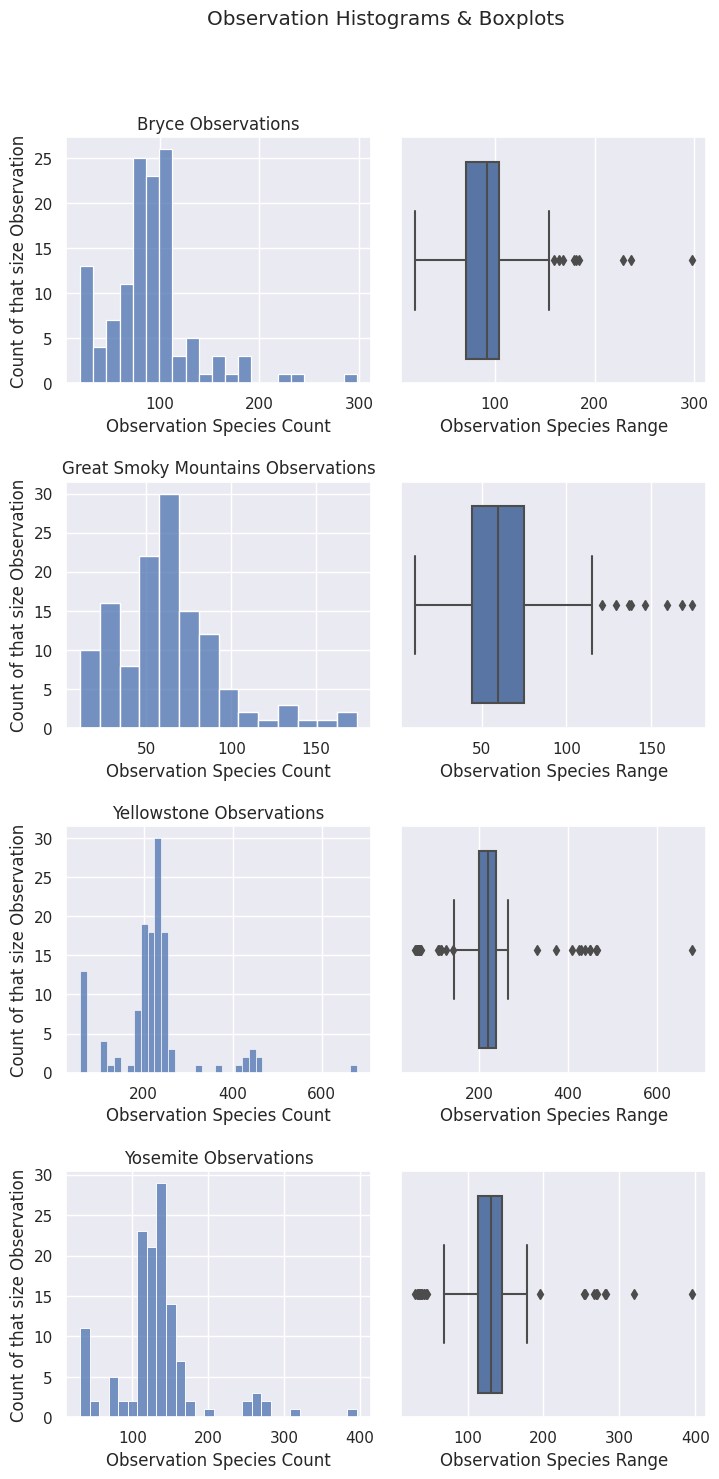

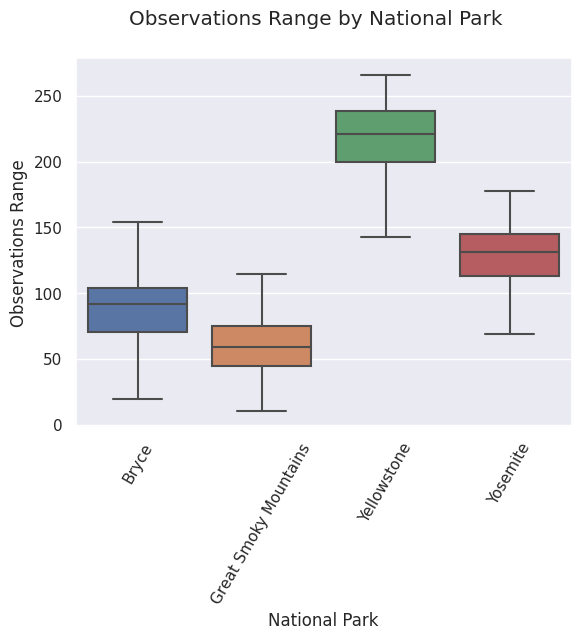

In [110]:
#Graph histograms of Observations for each park
biodiv_conservation_animals = biodiv_animals[biodiv_animals['protection_listing']==1]
parks = list(biodiv['park_name'].unique())
num = 1
fig =plt.figure('park_observation_normalcy', figsize=(8,16), )
fig.tight_layout()
fig.suptitle('Observation Histograms & Boxplots')
park_describe = {}
for park in parks:
    park_biodiv = biodiv_conservation_animals[biodiv_conservation_animals['park_name']==park]
    park_mean = park_biodiv['observations'].describe(include=all)
    park_describe[park]= park_mean
    plt.subplot(4,2,num)
    sns.histplot(park_biodiv['observations'])
    plt.title(park + ' Observations')
    plt.xlabel('Observation Species Count')
    plt.ylabel('Count of that size Observation')
    num +=1
    plt.subplot(4,2,num)
    sns.boxplot(x='observations', data=park_biodiv)
    plt.xlabel('Observation Species Range')
    num +=1
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.4)
plt.savefig('png_park_observation_normalcy.png')
plt.show()
plt.close('all')

fig2=plt.figure('park_relative_observations')
ax = plt.subplot(1,1,1)
sns.boxplot(data=biodiv_conservation_animals, x='park_name', y='observations', showfliers = False)
plt.suptitle('Observations Range by National Park')
plt.xlabel('National Park')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.ylabel('Observations Range')
plt.savefig('png_park_observations_range.png')
plt.show()
plt.close('all')
parks_describe_df = pd.DataFrame(park_describe)

ANOVA F and p value: 
                    sum_sq          df           F    PR(>F)
park_name 1817091.9453125   3.0000000 168.9832327 0.0000000
Residual  1820856.6093750 508.0000000         NaN       NaN
Model Results Summary: 
                            OLS Regression Results                            
Dep. Variable:           observations   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     169.0
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           5.73e-76
Time:                        17:34:09   Log-Likelihood:                -2819.7
No. Observations:                 512   AIC:                             5647.
Df Residuals:                     508   BIC:                             5664.
Df Model:                           3                                         
Covariance Type:            nonrobust                         

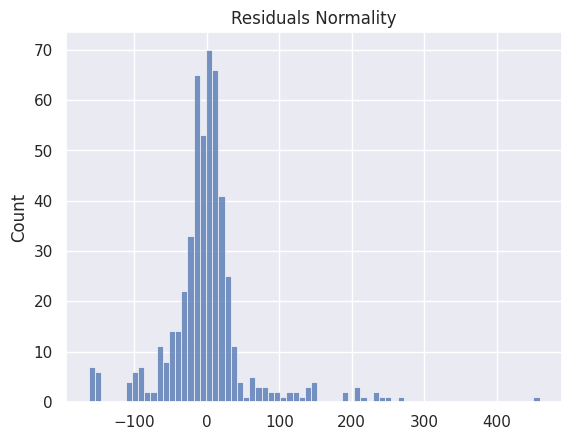

<Figure size 640x480 with 0 Axes>

In [111]:
#ANOVA using OLS- Ordinary Least Squares
model = sm.OLS.from_formula('observations~park_name', biodiv_conservation_animals)
results = model.fit()
anova_table = sm.stats.anova_lm(results, typ=2)
print(f"ANOVA F and p value: \n {anova_table}")
print(f"Model Results Summary: \n{results.summary()}")
residuals = biodiv_conservation_animals.observations-results.predict(biodiv_conservation_animals)
plt.figure()
sns.histplot(residuals)
plt.savefig('png_residules_park_obs_anova.png')
plt.title("Residuals Normality")
plt.show()
plt.clf()


                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
        group1                group2        meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------------
                Bryce Great Smoky Mountains -28.3203 0.001  -47.6099  -9.0307   True
                Bryce           Yellowstone 129.4609   0.0  110.1713 148.7506   True
                Bryce              Yosemite  41.3438   0.0   22.0541  60.6334   True
Great Smoky Mountains           Yellowstone 157.7812   0.0  138.4916 177.0709   True
Great Smoky Mountains              Yosemite  69.6641   0.0   50.3744  88.9537   True
          Yellowstone              Yosemite -88.1172   0.0 -107.4068 -68.8276   True
------------------------------------------------------------------------------------


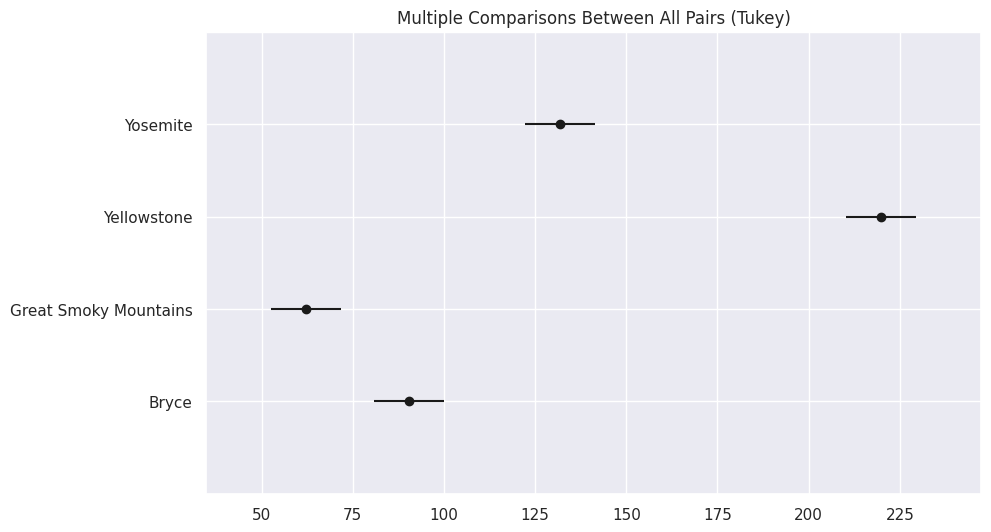

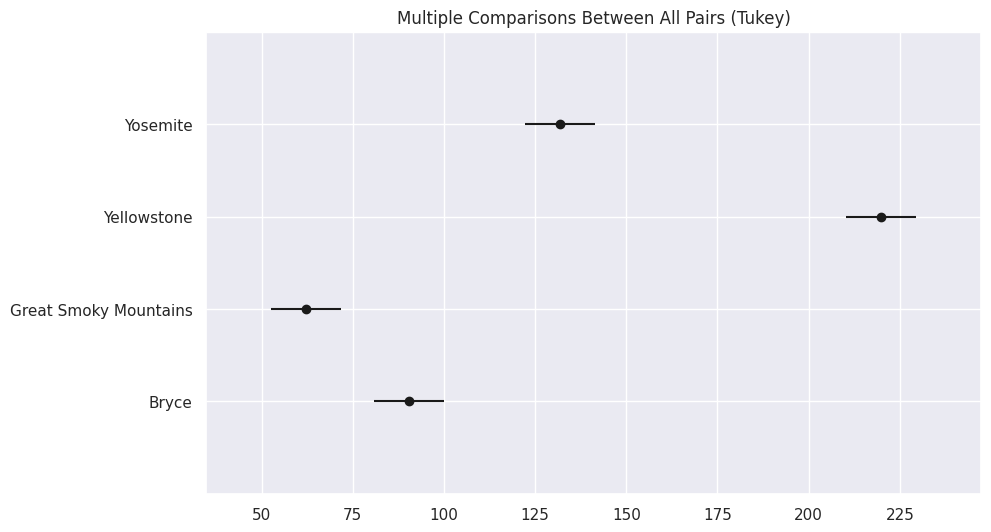

In [87]:
tukey_results = pairwise_tukeyhsd(endog=biodiv_conservation_animals['observations'], groups=biodiv_conservation_animals['park_name'], alpha=0.05)
# Print the results
print(tukey_results)

Since there is a correlation between conservation status and category and between park and observations. Let's see if there is an interaction between park and category with respect to their impact on observations.
- Method:
    1) 2-Way Anova
- Analysis:
- Conclusion: Park and Category are both independently correlated to observations in this data set, but they do not interact. 

In [88]:
pd.set_option('display.float_format', lambda x: '%.7f' % x)
model2 = sm.OLS.from_formula('observations~C(park_name)*C(category)', biodiv_conservation_animals)
results2 = model2.fit()
anova_table_2way = sm.stats.anova_lm(results2, typ=2)

print(anova_table_2way)

                                  sum_sq          df           F    PR(>F)
C(park_name)             1817091.9453125   3.0000000 173.1951432 0.0000000
C(category)                78915.6423715   4.0000000   5.6413516 0.0001908
C(park_name):C(category)   21320.6687351  12.0000000   0.5080420 0.9098909
Residual                 1720620.2982684 492.0000000         NaN       NaN


How are conservations status and observations correlated?
- Method:
- Analysis:
- Conclusion:

  conservation_status  observations
0          Endangered    47.0714286
1         In Recovery   116.0000000
2  Species of Concern   140.1432039
3          Threatened    87.0937500


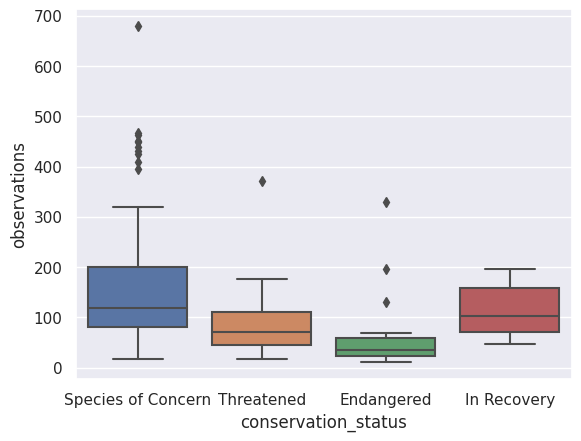

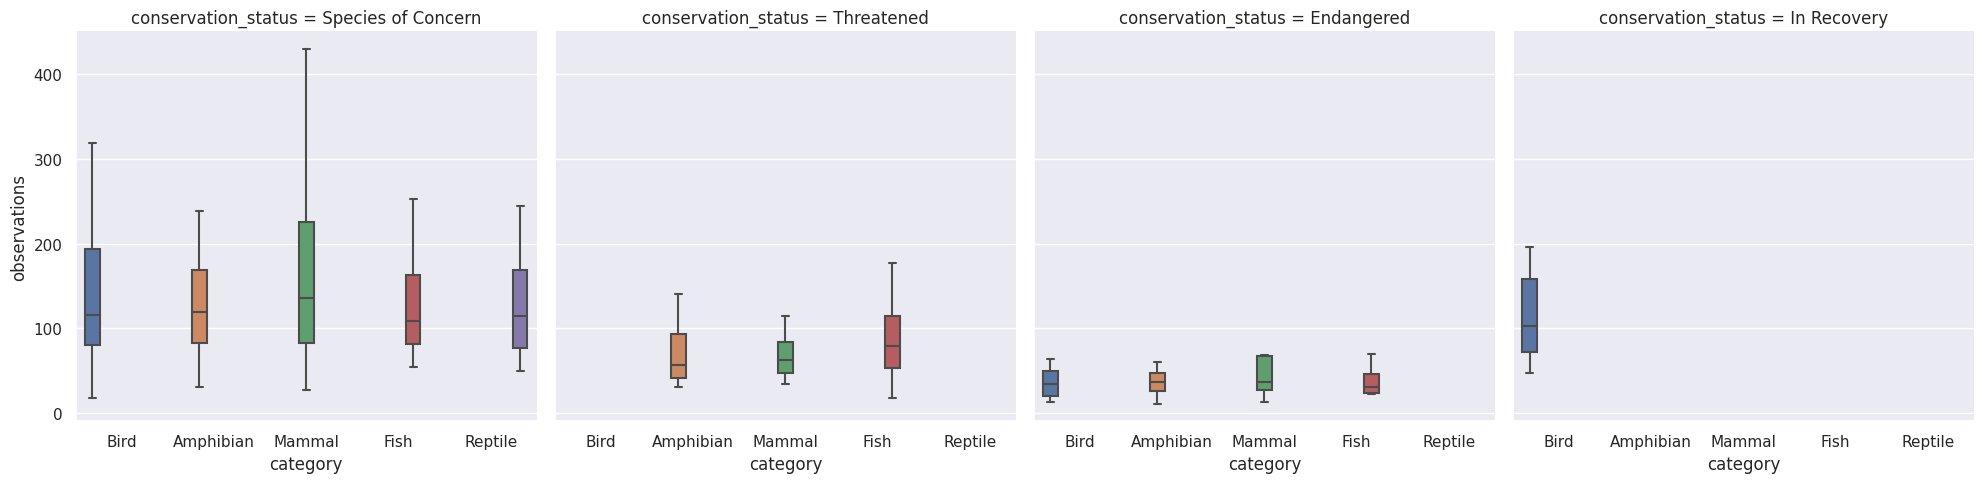

In [89]:
observation_mean_status = biodiv_conservation_animals.groupby('conservation_status',as_index=False)['observations'].mean()
print(observation_mean_status)
sns.boxplot(x='conservation_status', y='observations', data= biodiv_conservation_animals)
sns.catplot(data=biodiv_conservation_animals, col = 'conservation_status', x='category', y='observations', kind ='box', hue = 'category', showfliers = False)

#### Conclusion:
- Reprise questions and conclusions with a few key insights/applications.
    - Category is statisticall correlated with conservation status to a small to moderate degree
    - Park is strongly correlated with observations for animal species with a conservation protection status.
    - These are independent correlations, they do not interact. 
- Raise any new questions or future work
    - Interesting to investigate a more complete data set that include datetime and location of observations.
    - Interesting to investigate observations over time. 

#### Appendix:
- Technical Descriptions of unusual stats
- Detailed Tables, Computer output (not necessarily human friendly)
- Interesting or excessive figures
- Computer code used to obtain results. 